In [1]:
import pandas as pd

https://www.kaggle.com/datasets/brsdincer/star-type-classification/data

Carregar os dados

In [2]:
df_star = pd.read_csv("Stars.csv")

Qtd de linhas e colunas

In [3]:
df_star.shape

(240, 7)

Visualizar as 5 primeiras linhas

In [4]:
df_star.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


Visualizar as 5 ultima linhas

In [5]:
df_star.tail()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
235,38940,374830.0,1356.0,-9.93,Blue,O,5
236,30839,834042.0,1194.0,-10.63,Blue,O,5
237,8829,537493.0,1423.0,-10.73,White,A,5
238,9235,404940.0,1112.0,-11.23,White,A,5
239,37882,294903.0,1783.0,-7.80,Blue,O,5


# Vizualização de Dados

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from matplotlib.ticker import MultipleLocator
%matplotlib inline

Fazer em pares

In [7]:
df_star['L'].describe()

count       240.000000
mean     107188.361635
std      179432.244940
min           0.000080
25%           0.000865
50%           0.070500
75%      198050.000000
max      849420.000000
Name: L, dtype: float64

In [8]:
df_star.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')

In [9]:
df_star['Type']

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Type, Length: 240, dtype: int64

In [10]:
df_star['Type']

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Type, Length: 240, dtype: int64

In [11]:
df_star['Color'].unique().tolist()

['Red',
 'Blue White',
 'White',
 'Yellowish White',
 'Blue white',
 'Pale yellow orange',
 'Blue',
 'Blue-white',
 'Whitish',
 'yellow-white',
 'Orange',
 'White-Yellow',
 'white',
 'yellowish',
 'Yellowish',
 'Orange-Red',
 'Blue-White']

In [12]:
df_star[['Spectral_Class','Type']]

,Spectral_Class,Type
0,M,0
1,M,0
2,M,0
3,M,0
4,M,0
...,...,...
235,O,5
236,O,5
237,A,5
238,A,5


In [13]:
codes, unique = pd.factorize(df_star['Color'])

In [14]:
df_star['Color_factor'] = codes

In [15]:
df_star

,Temperature,L,R,A_M,Color,Spectral_Class,Type,Color_factor
0,3068,0.002400,0.1700,16.12,Red,M,0,0
1,3042,0.000500,0.1542,16.60,Red,M,0,0
2,2600,0.000300,0.1020,18.70,Red,M,0,0
3,2800,0.000200,0.1600,16.65,Red,M,0,0
4,1939,0.000138,0.1030,20.06,Red,M,0,0
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5,6
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5,6
237,8829,537493.000000,1423.0000,-10.73,White,A,5,2
238,9235,404940.000000,1112.0000,-11.23,White,A,5,2


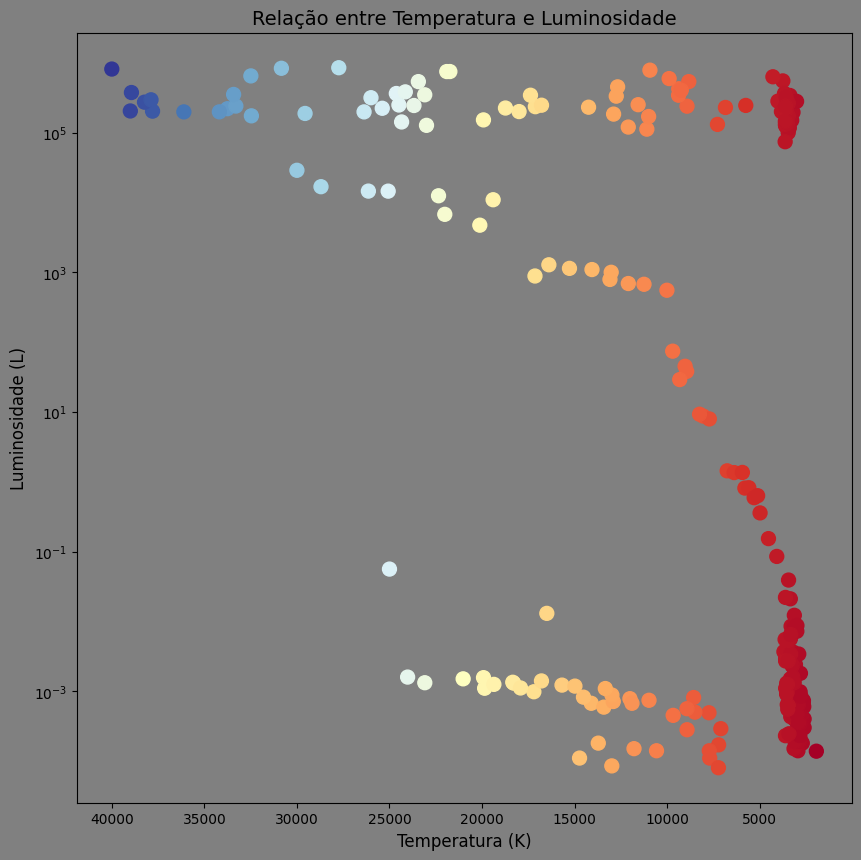

In [36]:
plt.figure(figsize=(10,10)).patch.set_facecolor("gray")
ax = plt.axes()
ax.set_facecolor('gray')
plt.scatter(df_star['Temperature'],df_star['L'],c=df_star['Temperature'], cmap=plt.get_cmap('RdYlBu'), alpha=1, marker='o',s=100)
plt.title('Relação entre Temperatura e Luminosidade', fontsize=14)
plt.xlabel('Temperatura (K)', fontsize=12)
plt.ylabel('Luminosidade (L)', fontsize=12)
plt.gca().invert_xaxis()
plt.yscale('log') 
plt.show()

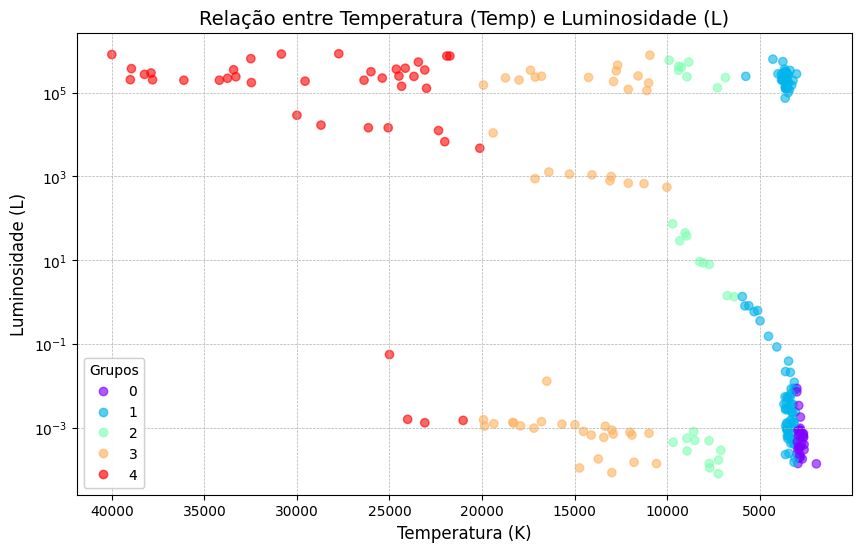

In [16]:
Temp = df_star['Temperature']
L = df_star['L']
groups = np.digitize(Temp, bins=[3000, 6000, 10000, 20000, 50000])  # Exemplo de agrupamento baseado na temperatura

# Definindo cores para cada grupo
colors = ['blue', 'green', 'orange', 'red', 'purple']

# Criando o gráfico com escala logarítmica no eixo Y
plt.figure(figsize=(10, 6))
scatter = plt.scatter(Temp, L, c=groups, cmap=plt.get_cmap('rainbow'), alpha=0.6)

# Configurando as escalas
plt.xscale('linear')  # Escala linear para a Temperatura
plt.yscale('log')     # Escala logarítmica para L

# Invertendo o eixo X
plt.gca().invert_xaxis()

# Adicionando rótulos e título
plt.title('Relação entre Temperatura (Temp) e Luminosidade (L)', fontsize=14)
plt.xlabel('Temperatura (K)', fontsize=12)
plt.ylabel('Luminosidade (L)', fontsize=12)

# Adicionando a legenda baseada nos grupos
legend1 = plt.legend(*scatter.legend_elements(), title="Grupos")
plt.gca().add_artist(legend1)

# Exibindo o gráfico
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

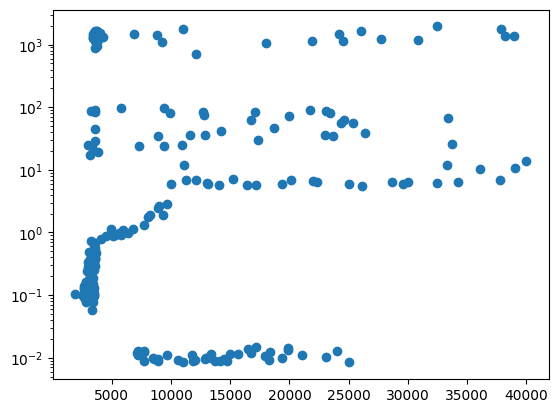

In [17]:
plt.scatter(df_star['Temperature'].to_list(),df_star['R'].to_list())
plt.yscale('log') 
plt.show()

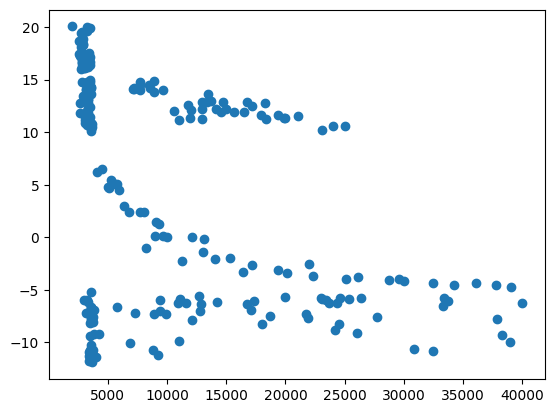

In [20]:
plt.scatter(df_star['Temperature'].to_list(),df_star['A_M'].to_list())
plt.show()

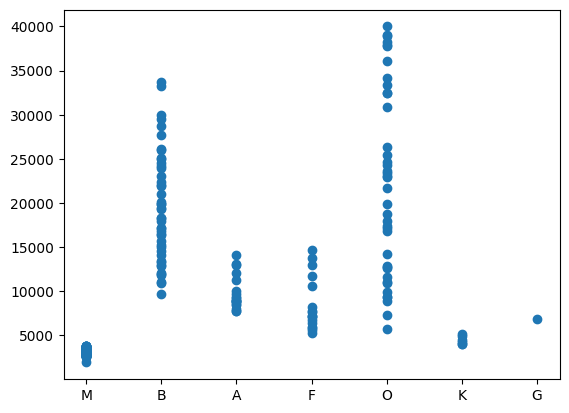

In [56]:
plt.scatter(df_star['Spectral_Class'].to_list(),df_star['Temperature'].to_list())
plt.show()

Radiação de corpo de negro
Lei de Stefan-Boltzmann

# Data Wrangler

## Color

Valores únicos em color

In [23]:
df_star['Color'].unique().tolist()

['Red',
 'Blue White',
 'White',
 'Yellowish White',
 'Blue white',
 'Pale yellow orange',
 'Blue',
 'Blue-white',
 'Whitish',
 'yellow-white',
 'Orange',
 'White-Yellow',
 'white',
 'yellowish',
 'Yellowish',
 'Orange-Red',
 'Blue-White']

Colocar em low_case

In [24]:
def lower_case_color(cor: str)-> str:
    return cor.lower()

In [25]:
df_star['Color'] = df_star['Color'].apply(lower_case_color)

In [26]:
df_star

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,red,M,0
1,3042,0.000500,0.1542,16.60,red,M,0
2,2600,0.000300,0.1020,18.70,red,M,0
3,2800,0.000200,0.1600,16.65,red,M,0
4,1939,0.000138,0.1030,20.06,red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,blue,O,5
236,30839,834042.000000,1194.0000,-10.63,blue,O,5
237,8829,537493.000000,1423.0000,-10.73,white,A,5
238,9235,404940.000000,1112.0000,-11.23,white,A,5


In [27]:
df_star['Color'].unique().tolist()

['red',
 'blue white',
 'white',
 'yellowish white',
 'pale yellow orange',
 'blue',
 'blue-white',
 'whitish',
 'yellow-white',
 'orange',
 'white-yellow',
 'yellowish',
 'orange-red']

Remover hifen na coluna Color

In [28]:
def remove_hifen_color(cor: str)-> str:
    return cor.replace("-"," ")

In [29]:
df_star['Color'] = df_star['Color'].apply(remove_hifen_color)

In [30]:
list_star_color = df_star['Color'].unique().tolist()

In [31]:
for cor in list_star_color:
    print(cor)
    display(df_star.query(f"Color == '{cor}'").describe())
    print("*****************************************************")

red


,Temperature,L,R,A_M,Type
count,112.000000,112.000000,112.000000,112.000000,112.000000
mean,3291.785714,60526.787893,283.529700,8.173384,1.705357
std,490.780761,104282.874572,558.149251,11.241259,1.975701
min,1939.000000,0.000138,0.057000,-11.920000,0.000000
25%,2987.500000,0.000629,0.117500,-6.300000,0.000000
50%,3324.000000,0.002550,0.299000,13.095000,1.000000
75%,3550.750000,123750.000000,26.000000,16.890000,4.000000
max,6850.000000,363000.000000,1673.000000,20.060000,5.000000


*****************************************************
blue white


,Temperature,L,R,A_M,Type
count,41.000000,41.000000,41.000000,41.000000,41.000000
mean,16659.951220,68904.416521,185.800842,1.968268,2.951220
std,6560.050964,185475.774192,464.118298,8.089971,0.973427
min,8570.000000,0.000280,0.008400,-9.900000,2.000000
25%,11900.000000,0.000880,0.009960,-3.800000,2.000000
50%,14100.000000,788.000000,5.745000,-1.380000,3.000000
75%,22012.000000,14500.000000,6.640000,11.380000,3.000000
max,30000.000000,849420.000000,1779.000000,14.870000,5.000000


*****************************************************
white


,Temperature,L,R,A_M,Type
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,9720.300000,94243.300229,253.507866,8.726000,2.600000
std,2563.623176,201123.823736,539.424654,10.420046,1.264911
min,7220.000000,0.000110,0.008780,-11.230000,2.000000
25%,7930.000000,0.000148,0.008990,12.237500,2.000000
50%,8879.500000,0.000335,0.009750,13.375000,2.000000
75%,10239.250000,0.000545,0.012005,14.177500,2.000000
max,14732.000000,537493.000000,1423.000000,14.810000,5.000000


*****************************************************
yellowish white


,Temperature,L,R,A_M,Type
count,3.000000,3.000000,3.000000,3.000000,3.0
mean,10826.666667,0.000115,0.011213,13.096667,2.0
std,2773.451520,0.000033,0.001491,1.202885,0.0
min,7700.000000,0.000085,0.009840,12.230000,2.0
25%,9745.000000,0.000098,0.010420,12.410000,2.0
50%,11790.000000,0.000110,0.011000,12.590000,2.0
75%,12390.000000,0.000130,0.011900,13.530000,2.0
max,12990.000000,0.000150,0.012800,14.470000,2.0


*****************************************************
pale yellow orange


,Temperature,L,R,A_M,Type
count,1.0,1.00000,1.000,1.00,1.0
mean,7230.0,0.00008,0.013,14.08,2.0
std,NaN,NaN,NaN,NaN,NaN
min,7230.0,0.00008,0.013,14.08,2.0
25%,7230.0,0.00008,0.013,14.08,2.0
50%,7230.0,0.00008,0.013,14.08,2.0
75%,7230.0,0.00008,0.013,14.08,2.0
max,7230.0,0.00008,0.013,14.08,2.0


*****************************************************
blue


,Temperature,L,R,A_M,Type
count,56.000000,56.000000,56.000000,56.000000,56.000000
mean,21918.339286,249974.732446,214.802452,-2.382446,3.571429
std,9453.979609,217947.633816,495.681463,7.934955,0.988243
min,5752.000000,0.001090,0.009340,-10.840000,2.000000
25%,14797.750000,123250.000000,6.351750,-6.912500,3.000000
50%,19921.500000,223890.000000,35.500000,-5.982500,4.000000
75%,27489.500000,342910.000000,80.250000,-4.390000,4.000000
max,40000.000000,834042.000000,1948.500000,12.900000,5.000000


*****************************************************
whitish


,Temperature,L,R,A_M,Type
count,2.000000,2.000000,2.000000,2.000000,2.0
mean,8876.000000,41.350000,2.345000,1.290000,3.0
std,1165.311975,46.174073,0.770746,1.598061,0.0
min,8052.000000,8.700000,1.800000,0.160000,3.0
25%,8464.000000,25.025000,2.072500,0.725000,3.0
50%,8876.000000,41.350000,2.345000,1.290000,3.0
75%,9288.000000,57.675000,2.617500,1.855000,3.0
max,9700.000000,74.000000,2.890000,2.420000,3.0


*****************************************************
yellow white


,Temperature,L,R,A_M,Type
count,8.000000,8.000000,8.000000,8.000000,8.0
mean,6466.250000,2.940750,1.159500,3.353750,3.0
std,1049.074524,3.515042,0.342515,2.143461,0.0
min,5300.000000,0.590000,0.900000,-0.980000,3.0
25%,5746.750000,0.816750,0.962500,2.432500,3.0
50%,6158.000000,1.353500,1.048000,3.695000,3.0
75%,6997.750000,3.052500,1.175000,5.035000,3.0
max,8250.000000,9.250000,1.930000,5.490000,3.0


*****************************************************
orange


,Temperature,L,R,A_M,Type
count,2.000000,2.000000,2.000000,2.000000,2.0
mean,4018.000000,590000.000000,1481.500000,-8.625000,5.0
std,380.423448,56568.542495,235.466558,0.813173,0.0
min,3749.000000,550000.000000,1315.000000,-9.200000,5.0
25%,3883.500000,570000.000000,1398.250000,-8.912500,5.0
50%,4018.000000,590000.000000,1481.500000,-8.625000,5.0
75%,4152.500000,610000.000000,1564.750000,-8.337500,5.0
max,4287.000000,630000.000000,1648.000000,-8.050000,5.0


*****************************************************
white yellow


,Temperature,L,R,A_M,Type
count,1.0,1.00000,1.000,1.00,1.0
mean,7100.0,0.00029,0.012,14.09,2.0
std,NaN,NaN,NaN,NaN,NaN
min,7100.0,0.00029,0.012,14.09,2.0
25%,7100.0,0.00029,0.012,14.09,2.0
50%,7100.0,0.00029,0.012,14.09,2.0
75%,7100.0,0.00029,0.012,14.09,2.0
max,7100.0,0.00029,0.012,14.09,2.0


*****************************************************
yellowish


,Temperature,L,R,A_M,Type
count,3.000000,3.000000,3.000000,3.000000,3.0
mean,4527.666667,0.198333,0.930000,5.838000,3.0
std,451.502307,0.141553,0.176706,0.926738,0.0
min,4077.000000,0.085000,0.795000,4.780000,3.0
25%,4301.500000,0.119000,0.830000,5.504000,3.0
50%,4526.000000,0.153000,0.865000,6.228000,3.0
75%,4753.000000,0.255000,0.997500,6.367000,3.0
max,4980.000000,0.357000,1.130000,6.506000,3.0


*****************************************************
orange red


,Temperature,L,R,A_M,Type
count,1.0,1.00,1.000,1.00,1.0
mean,5112.0,0.63,0.876,4.68,3.0
std,NaN,NaN,NaN,NaN,NaN
min,5112.0,0.63,0.876,4.68,3.0
25%,5112.0,0.63,0.876,4.68,3.0
50%,5112.0,0.63,0.876,4.68,3.0
75%,5112.0,0.63,0.876,4.68,3.0
max,5112.0,0.63,0.876,4.68,3.0


*****************************************************


## Type

In [15]:
df_star.rename({"Type":"Target"},axis='columns', inplace=True)

In [16]:
dict_type_star = {
    0:"RED DWARF"    ,
    1:"BROWN DWARF"  ,
    2:"WHITE DWARF"  ,
    3:"MAIN SEQUENCE",
    4:"SUPER GIANTS" ,
    5:"HYPER GIANTS" 
}

In [17]:
def class_star(tipo: int):
    return dict_type_star[tipo]

In [18]:
df_star['Type'] = df_star['Target'].apply(class_star)

In [19]:
df_star

,Temperature,L,R,A_M,Color,Spectral_Class,Target,Type
0,3068,0.002400,0.1700,16.12,red,M,0,RED DWARF
1,3042,0.000500,0.1542,16.60,red,M,0,RED DWARF
2,2600,0.000300,0.1020,18.70,red,M,0,RED DWARF
3,2800,0.000200,0.1600,16.65,red,M,0,RED DWARF
4,1939,0.000138,0.1030,20.06,red,M,0,RED DWARF
...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,blue,O,5,HYPER GIANTS
236,30839,834042.000000,1194.0000,-10.63,blue,O,5,HYPER GIANTS
237,8829,537493.000000,1423.0000,-10.73,white,A,5,HYPER GIANTS
238,9235,404940.000000,1112.0000,-11.23,white,A,5,HYPER GIANTS


In [20]:
def separate_type(tipo:str)->str:
    return tipo.split(" ")[-1]

In [21]:
df_star['Size'] = df_star['Type'].apply(separate_type)

In [22]:
df_star.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Target,Type,Size
0,3068,0.002400,0.1700,16.12,red,M,0,RED DWARF,DWARF
1,3042,0.000500,0.1542,16.60,red,M,0,RED DWARF,DWARF
2,2600,0.000300,0.1020,18.70,red,M,0,RED DWARF,DWARF
3,2800,0.000200,0.1600,16.65,red,M,0,RED DWARF,DWARF
4,1939,0.000138,0.1030,20.06,red,M,0,RED DWARF,DWARF


In [23]:
df_star_dwarf = df_star.query("Size == 'DWARF'")

In [24]:
df_star_mainsequence = df_star.query("Size == 'SEQUENCE'")

In [25]:
df_star_giants = df_star.query("Size == 'GIANTS'")

In [26]:
df_star_dwarf.describe()

,Temperature,L,R,A_M,Target
count,120.000000,120.000000,120.000000,120.000000,120.00000
mean,6737.741667,0.002844,0.156296,14.228658,1.00000
std,5849.870845,0.006908,0.168082,2.699811,0.81992
min,1939.000000,0.000080,0.008400,10.120000,0.00000
25%,3030.000000,0.000435,0.012075,11.920000,0.00000
50%,3436.500000,0.000860,0.102500,13.725000,1.00000
75%,9116.250000,0.001650,0.240000,16.680000,2.00000
max,25000.000000,0.056000,0.730000,20.060000,2.00000


In [27]:
df_star_mainsequence.describe()

,Temperature,L,R,A_M,Target
count,40.000000,40.000000,40.00000,40.000000,40.0
mean,16018.000000,32067.386275,4.43030,-0.367425,3.0
std,10661.234972,69351.195858,2.80139,3.613592,0.0
min,4077.000000,0.085000,0.79500,-4.700000,3.0
25%,7479.250000,6.297500,1.28750,-3.702500,3.0
50%,12560.500000,738.500000,5.71250,-1.180000,3.0
75%,23030.000000,12962.500000,6.36750,2.425000,3.0
max,39000.000000,204000.000000,10.60000,6.506000,3.0


In [28]:
df_star_giants.describe()

,Temperature,L,R,A_M,Target
count,80.000000,80.000000,80.000000,80.000000,80.000000
mean,13376.775000,305531.387500,709.023750,-8.012087,4.500000
std,11094.991039,186764.904255,686.218896,1.982117,0.503155
min,3008.000000,74000.000000,12.000000,-11.920000,4.000000
25%,3614.750000,192250.000000,44.250000,-9.907500,4.000000
50%,9378.000000,245865.000000,403.450000,-7.515000,4.500000
75%,23023.750000,348865.000000,1350.750000,-6.237500,5.000000
max,40000.000000,849420.000000,1948.500000,-5.240000,5.000000


### ANOVA

In [30]:
import scipy.stats as stats
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [35]:
stats.f_oneway(df_star_giants['R'],
               df_star_mainsequence['R'],
               df_star_dwarf['R'])

F_onewayResult(statistic=np.float64(85.11179864271142), pvalue=np.float64(1.388276859359581e-28))

In [35]:
stats.f_oneway(df_star_giants['R'],
               df_star_mainsequence['R'])

F_onewayResult(statistic=np.float64(41.99251954903741), pvalue=np.float64(2.213388926238727e-09))

In [36]:
stats.f_oneway(df_star_giants['R'],
               df_star_dwarf['R'])

F_onewayResult(statistic=np.float64(128.37605510424822), pvalue=np.float64(2.9116011434268237e-23))

In [37]:
stats.f_oneway(df_star_mainsequence['R'],
               df_star_dwarf['R'])

F_onewayResult(statistic=np.float64(279.8284569015112), pvalue=np.float64(8.482149559035288e-37))

In [60]:
dados = df_star_dwarf['R'].to_list()+df_star_mainsequence['R'].to_list()+df_star_giants['R'].to_list()

In [65]:
grupos = df_star_dwarf["Size"].tolist() + df_star_giants['Size'].tolist()+df_star_mainsequence['Size'].tolist()

In [66]:
tukey_result = pairwise_tukeyhsd(endog=dados, groups=grupos, alpha=0.05)

In [68]:
print(tukey_result)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1  group2  meandiff p-adj   lower    upper   reject
--------------------------------------------------------
 DWARF   GIANTS 354.4339    0.0  202.821 506.0467   True
 DWARF SEQUENCE 713.1412    0.0 521.3644  904.918   True
GIANTS SEQUENCE 358.7074 0.0001 155.2973 562.1174   True
--------------------------------------------------------


# Spectral Class

In [38]:
list_spectral_class = df_star['Spectral_Class'].unique().tolist()

In [42]:
list_spectral_class.sort()

In [43]:
list_spectral_class

['A', 'B', 'F', 'G', 'K', 'M', 'O']

In [44]:
for sc in list_spectral_class:
    print(f"Spectral Class:\t{sc}")
    print(df_star.query(f"Spectral_Class == '{sc}'")['Type'].unique().tolist())
    print("***********************************************************************")

Spectral Class:	A
['WHITE DWARF', 'MAIN SEQUENCE', 'HYPER GIANTS']
***********************************************************************
Spectral Class:	B
['WHITE DWARF', 'MAIN SEQUENCE', 'SUPER GIANTS', 'HYPER GIANTS']
***********************************************************************
Spectral Class:	F
['WHITE DWARF', 'MAIN SEQUENCE']
***********************************************************************
Spectral Class:	G
['HYPER GIANTS']
***********************************************************************
Spectral Class:	K
['MAIN SEQUENCE', 'HYPER GIANTS']
***********************************************************************
Spectral Class:	M
['RED DWARF', 'BROWN DWARF', 'SUPER GIANTS', 'HYPER GIANTS']
***********************************************************************
Spectral Class:	O
['MAIN SEQUENCE', 'SUPER GIANTS', 'HYPER GIANTS']
***********************************************************************
